In [20]:
import tensorflow as tf 
import pandas as pd 
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError

## Data Processing

In [2]:
data_path = './archive/'

In [3]:
data = pd.read_csv(data_path + 'train.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
all_features = data.columns.to_list()
print(all_features)

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [5]:
remove_features = ['v.id', 'on road old', 'on road now']
features = [feature for feature in all_features if feature not in remove_features]
print(features)

['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [6]:
# sns.pairplot(data[features], diag_kind='kde')

In [7]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Convert data to tensor data

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data.shape)
print(tensor_data)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[1.860000e+02 6.079560e+05 8.242960e+05 6.000000e+00 1.351630e+05
  3.000000e+00 4.000000e+00 1.100000e+01 1.880000e+02 7.000000e+01
  1.060000e+02 1.724620e+05]
 [6.350000e+02 5.618910e+05 8.424090e+05 3.000000e+00 1.400230e+05
  5.000000e+00 7.000000e+00 9.000000e+00 1.740000e+02 8.000000e+01
  1.110000e+02 1.521255e+05]
 [1.960000e+02 5.969910e+05 8.159990e+05 6.000000e+00 5.806400e+04
  3.000000e+00 1.000000e+01 8.000000e+00 1.370000e+02 8.700000e+01
  8.600000e+01 5.206595e+05]
 [9.520000e+02 5.159830e+05 7.005360e+05 7.000000e+00 1.040790e+05
  4.000000e+00 6.000000e+00 1.300000e+01 1.380000e+02 6.400000e+01
  1.210000e+02 1.881860e+05]
 [2.870000e+02 6.988480e+05 7.062800e+05 7.000000e+00 1.111940e+05
  2.000000e+00 1.000000e+01 1.000000e+01 1.990000e+02 5.700000e+01
  1.330000e+02 2.996450e+05]], shape=(5, 12), dtype=float32)


In [10]:
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[6.00000e+00 1.35163e+05 3.00000e+00 4.00000e+00 1.10000e+01 1.88000e+02
  7.00000e+01 1.06000e+02]
 [3.00000e+00 1.40023e+05 5.00000e+00 7.00000e+00 9.00000e+00 1.74000e+02
  8.00000e+01 1.11000e+02]
 [6.00000e+00 5.80640e+04 3.00000e+00 1.00000e+01 8.00000e+00 1.37000e+02
  8.70000e+01 8.60000e+01]
 [7.00000e+00 1.04079e+05 4.00000e+00 6.00000e+00 1.30000e+01 1.38000e+02
  6.40000e+01 1.21000e+02]
 [7.00000e+00 1.11194e+05 2.00000e+00 1.00000e+01 1.00000e+01 1.99000e+02
  5.70000e+01 1.33000e+02]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[172462. ]
 [152125.5]
 [520659.5]
 [188186. ]
 [299645. ]], shape=(5, 1), dtype=float32)


## Normalization
$$
\text{normalization} = \frac{X - \mu}{\sigma}, \quad \text{where $\mu$ = mean and $\sigma$ = std}
$$
```
Normalization()
```
Default axis = -1 means mean and std will be calculated based on columns, and then normalization will be performed along the columns.

In [12]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8374954 ,  1.1974436 ,  0.00855871, -0.56393164, -0.28034022,
         1.0948331 , -0.70932907,  0.12243387],
       [-0.9084978 ,  1.3642482 ,  1.4350008 ,  0.4987539 , -1.1774288 ,
         0.3686443 , -0.22168303,  0.359984  ],
       [ 0.8374954 , -1.4487435 ,  0.00855871,  1.5614395 , -1.6259732 ,
        -1.550569  ,  0.1196692 , -0.8277667 ],
       [ 1.4194931 ,  0.13058048,  0.72177976,  0.1445254 ,  0.61674845,
        -1.4986984 , -1.0019166 ,  0.8350843 ],
       [ 1.4194931 ,  0.37478107, -0.7046623 ,  1.5614395 , -0.7288845 ,
         1.66541   , -1.3432689 ,  1.4052047 ]], dtype=float32)>

In [16]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),

    normalizer,

    Dense(1)  # as we need only one output for current_price.

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


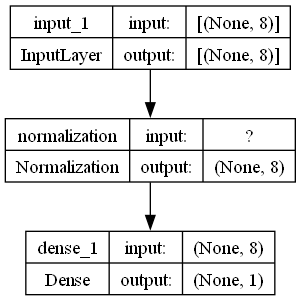

In [17]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Training and Optimization

In [23]:
model.compile(loss=MeanAbsoluteError())

In [24]:
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100

32/32 [==============================] - 1s 5ms/step - loss: 308520.2500
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.1562
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.1562
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.1250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0625
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.0312
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.0312
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 308519.9688
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 308519.9688
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 308519.9062
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 308519.8750
Epoch 12/100
32/32 [==============================] - 0s 2ms/s